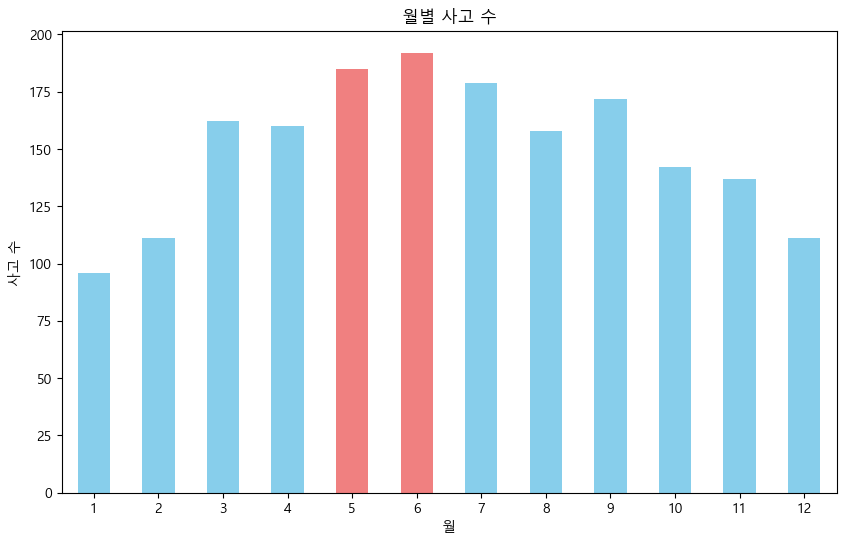

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '2017~2019 서울시 어린이 보행자사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color=['skyblue','skyblue','skyblue','skyblue','lightcoral','lightcoral','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue'])
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

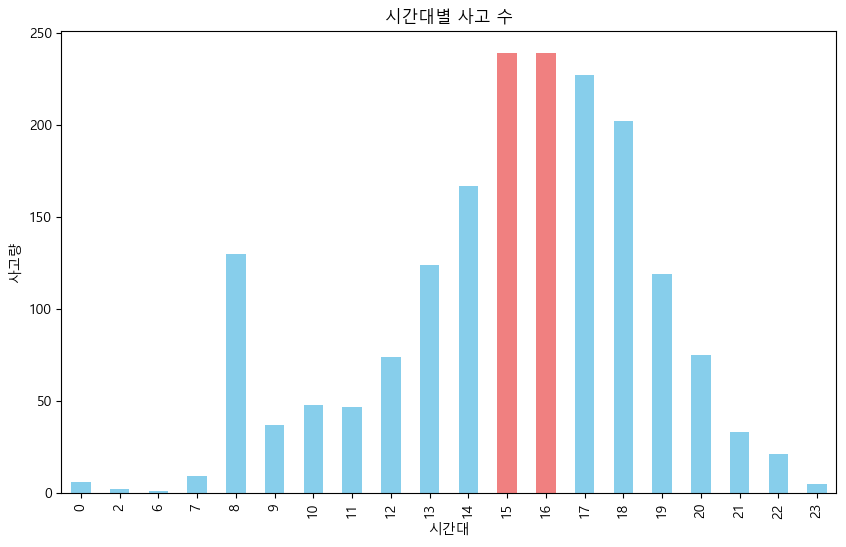

In [168]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color=['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','lightcoral',
                                 'lightcoral','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue'])
plt.title('시간대별 사고 수')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

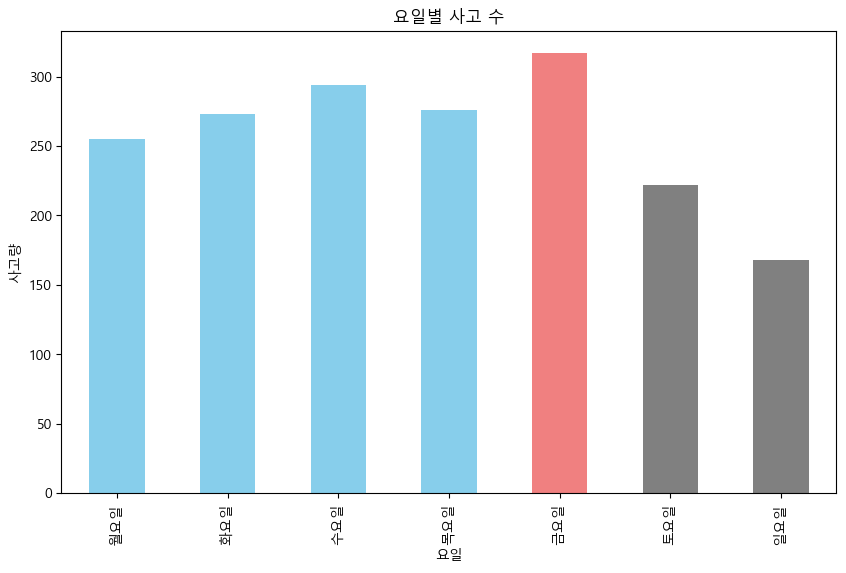

In [169]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '요일' 컬럼을 기준으로 그룹화하여 사고 수 계산
요일별_사고수 = df['요일'].value_counts().sort_index()

# '요일' 컬럼을 범주형으로 변환하고 순서 지정
요일_순서 = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df['요일'] = pd.Categorical(df['요일'], categories=요일_순서, ordered=True)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
요일별_사고수 = df['요일'].value_counts().sort_index()  # 다시 계산
요일별_사고수.plot(kind='bar', color=['skyblue','skyblue','skyblue','skyblue','lightcoral','grey','grey'])
plt.title('요일별 사고 수')
plt.xlabel('요일')
plt.ylabel('사고량')
plt.show()

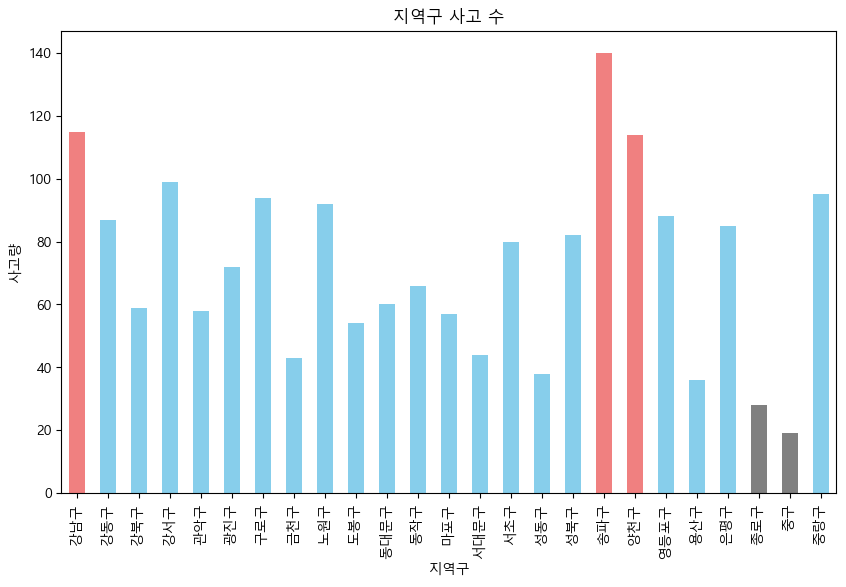

In [170]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역구'] = df['시군구'].apply(lambda x: x.split()[1] if pd.notnull(x) and isinstance(x, str) else None)

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역구'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
지역별_사고수.plot(kind='bar', color=['lightcoral','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue',
                                 'skyblue','skyblue','skyblue','skyblue','skyblue','lightcoral','lightcoral','skyblue','skyblue','skyblue','grey','grey','skyblue'])
plt.title('지역구 사고 수')
plt.xlabel('지역구')
plt.ylabel('사고량')
plt.show()

In [183]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역구'] = df['시군구'].apply(lambda x: x.split()[1] if pd.notnull(x) and isinstance(x, str) else None)

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역구'].value_counts().sort_index()

# 각 지역구의 사고 수를 출력
for 지역, 사고수 in 지역별_사고수.items():
    print(f'{지역}: {사고수} 건')

강남구: 115 건
강동구: 87 건
강북구: 59 건
강서구: 99 건
관악구: 58 건
광진구: 72 건
구로구: 94 건
금천구: 43 건
노원구: 92 건
도봉구: 54 건
동대문구: 60 건
동작구: 66 건
마포구: 57 건
서대문구: 44 건
서초구: 80 건
성동구: 38 건
성북구: 82 건
송파구: 140 건
양천구: 114 건
영등포구: 88 건
용산구: 36 건
은평구: 85 건
종로구: 28 건
중구: 19 건
중랑구: 95 건


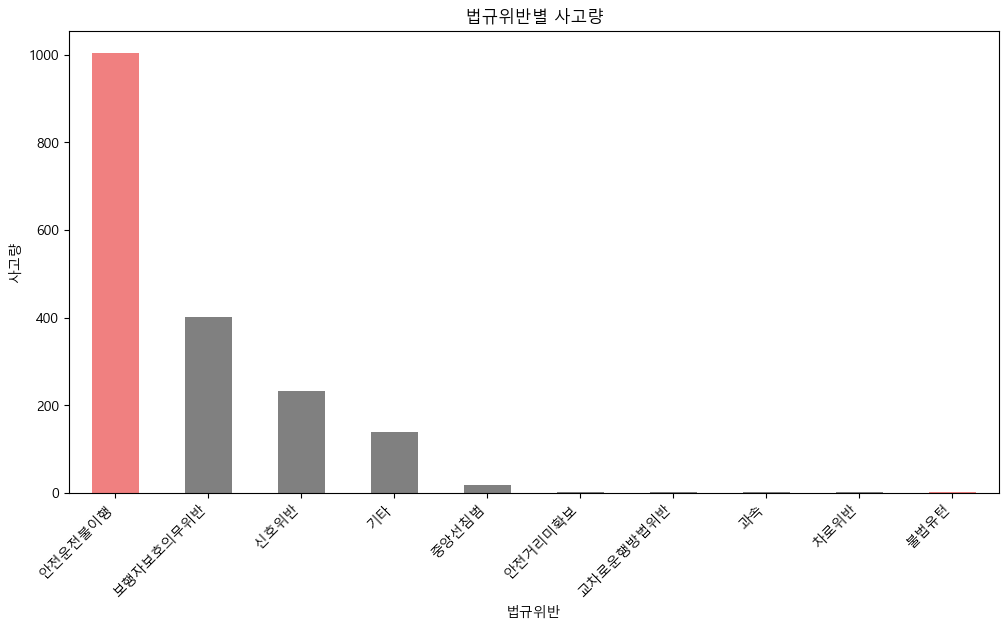

In [171]:
# 법규위반별 사고 수 계산
법규위반별_사고수 = df['법규위반'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
법규위반별_사고수.plot(kind='bar', color=['lightcoral','grey','grey','grey','grey','grey','grey','grey','grey'])
plt.title('법규위반별 사고량')
plt.xlabel('법규위반')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

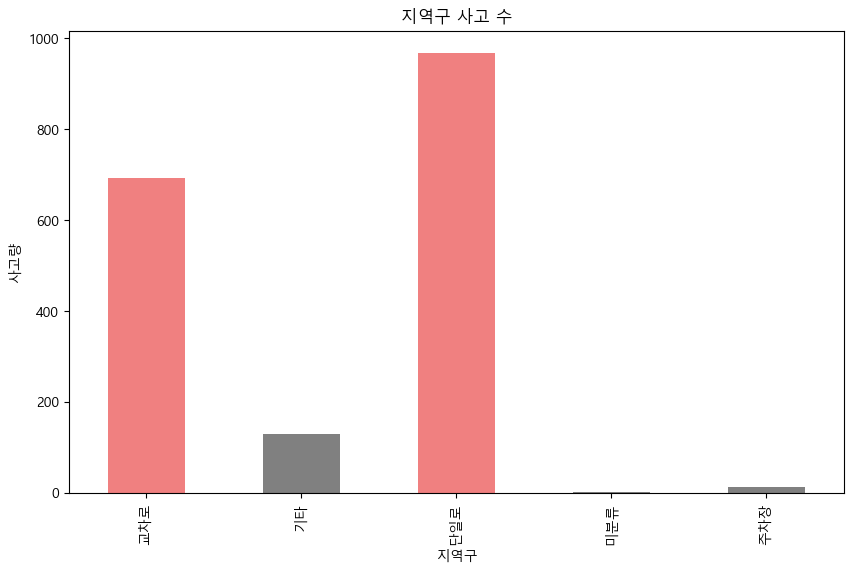

In [172]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['도로형태'] = df['도로형태'].apply(lambda x: x.split()[0] if pd.notnull(x) and isinstance(x, str) else None)

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
도로형태별_사고수 = df['도로형태'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
도로형태별_사고수.plot(kind='bar', color=['lightcoral','grey','lightcoral','grey','grey'])
plt.title('지역구 사고 수')
plt.xlabel('지역구')
plt.ylabel('사고량')
plt.show()

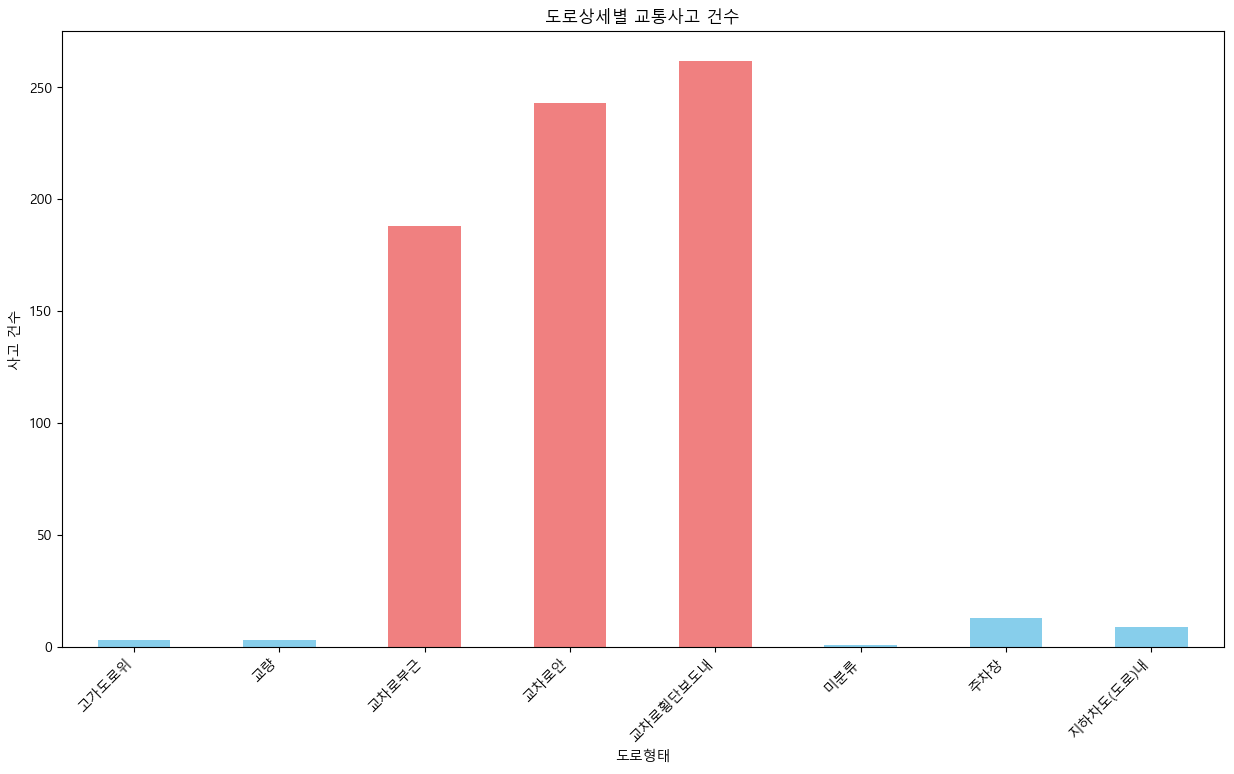

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '2017~2019 서울시 어린이 보행자사고.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# 도로형태에서 '- 기타'인 경우를 제외하고 새로운 컬럼 생성
df['도로형태_추출'] = df['도로형태'].apply(lambda x: x.split('- ')[1].strip() if pd.notnull(x) and isinstance(x, str) and '- 기타' not in x else None)

# 결측치 제거
df = df.dropna(subset=['도로형태_추출'])

# '도로형태_추출' 컬럼을 기준으로 그룹화하여 사고 수 계산
도로형태별_사고수 = df['도로형태_추출'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
도로형태별_사고수.plot(kind='bar', color=['skyblue','skyblue','lightcoral','lightcoral','lightcoral','skyblue','skyblue','skyblue'])
plt.title('도로상세별 교통사고 건수')
plt.xlabel('도로형태')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

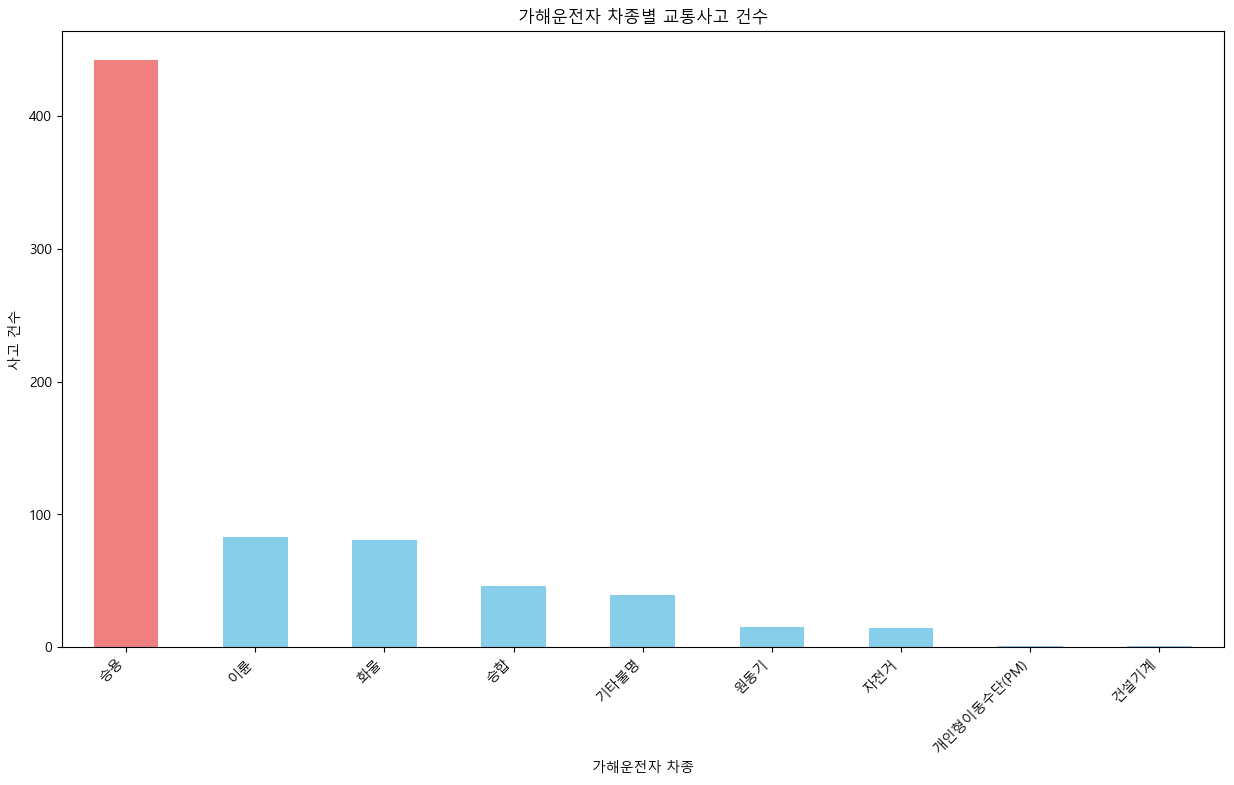

In [174]:
# 가해운전자 차종별로 그룹화하여 사고 수 계산
차종별_사고수 = df['가해운전자 차종'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
차종별_사고수.plot(kind='bar', color=['lightcoral'] + ['skyblue'] * (len(차종별_사고수) - 1))
plt.title('가해운전자 차종별 교통사고 건수')
plt.xlabel('가해운전자 차종')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

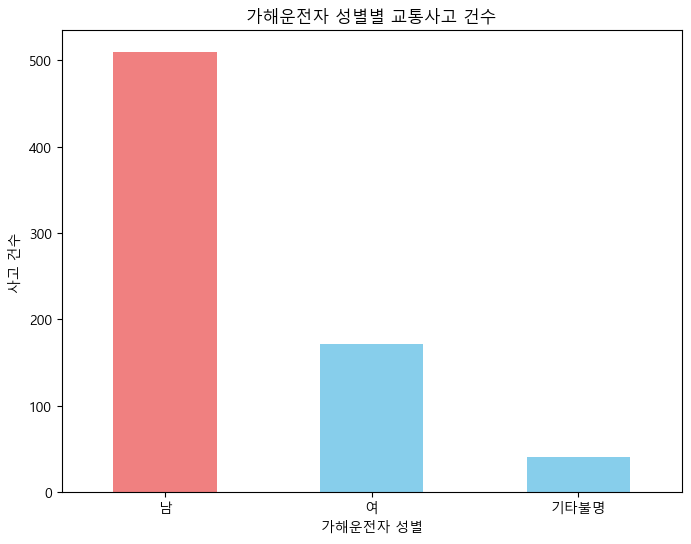

In [175]:
# 가해운전자 성별별로 그룹화하여 사고 수 계산
성별별_사고수 = df['가해운전자 성별'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
성별별_사고수.plot(kind='bar', color=['lightcoral','skyblue','skyblue'])
plt.title('가해운전자 성별별 교통사고 건수')
plt.xlabel('가해운전자 성별')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)  # X축 레이블 회전 없이 표시
plt.show()

C:\Users\ogi\AppData\Local\Temp\ipykernel_13432\4195452924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_age['연령구간'] = pd.cut(pd.to_numeric(df_valid_age['가해운전자 연령']), bins=bins, labels=labels)


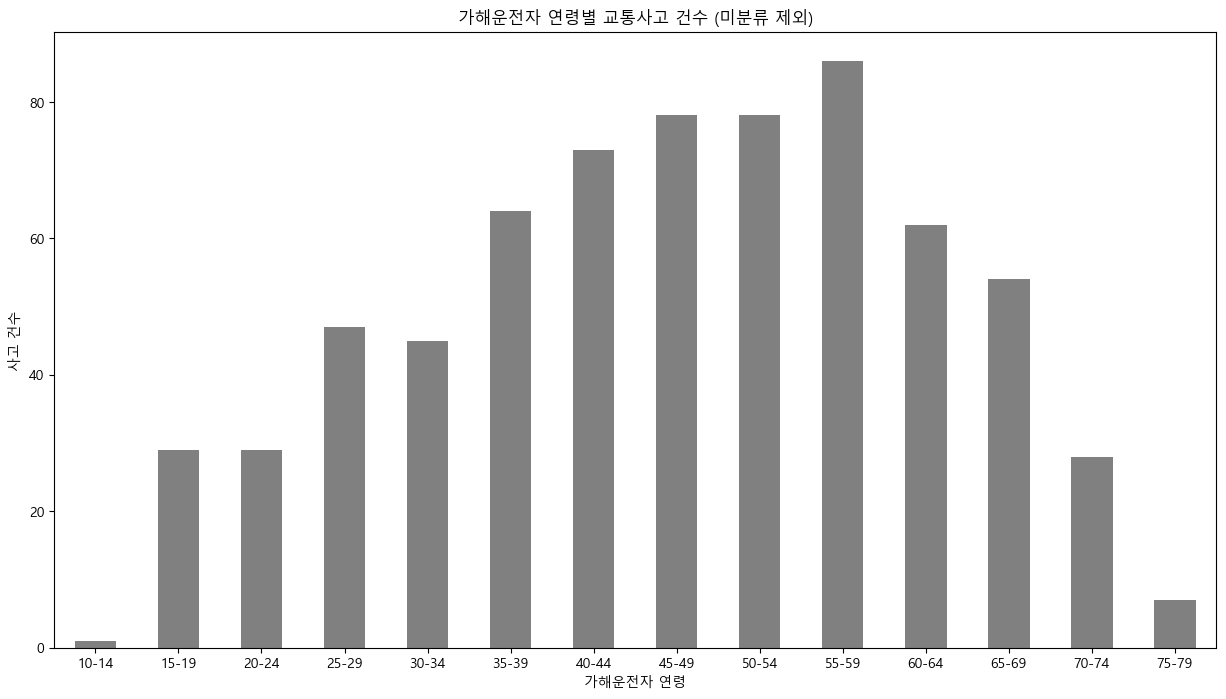

In [176]:
# '가해운전자 연령'에서 '세' 제거하고 숫자만 추출
df['가해운전자 연령'] = df['가해운전자 연령'].str.replace('세', '').str.strip()

# '미분류' 제외하고 가해운전자 연령별로 그룹화하여 사고 수 계산
df_valid_age = df[df['가해운전자 연령'] != '미분류']

# 5세 간격으로 연령을 묶어 새로운 컬럼 추가
bins = list(range(10, 81, 5))
labels = [f'{i}-{i+4}' for i in range(10, 80, 5)]
df_valid_age['연령구간'] = pd.cut(pd.to_numeric(df_valid_age['가해운전자 연령']), bins=bins, labels=labels)

# '미분류' 제외하고 연령구간별로 그룹화하여 사고 수 계산
연령구간별_사고수 = df_valid_age['연령구간'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
연령구간별_사고수.sort_index().plot(kind='bar', color='grey')
plt.title('가해운전자 연령별 교통사고 건수 (미분류 제외)')
plt.xlabel('가해운전자 연령')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)  # X축 레이블 회전 없이 표시
plt.show()

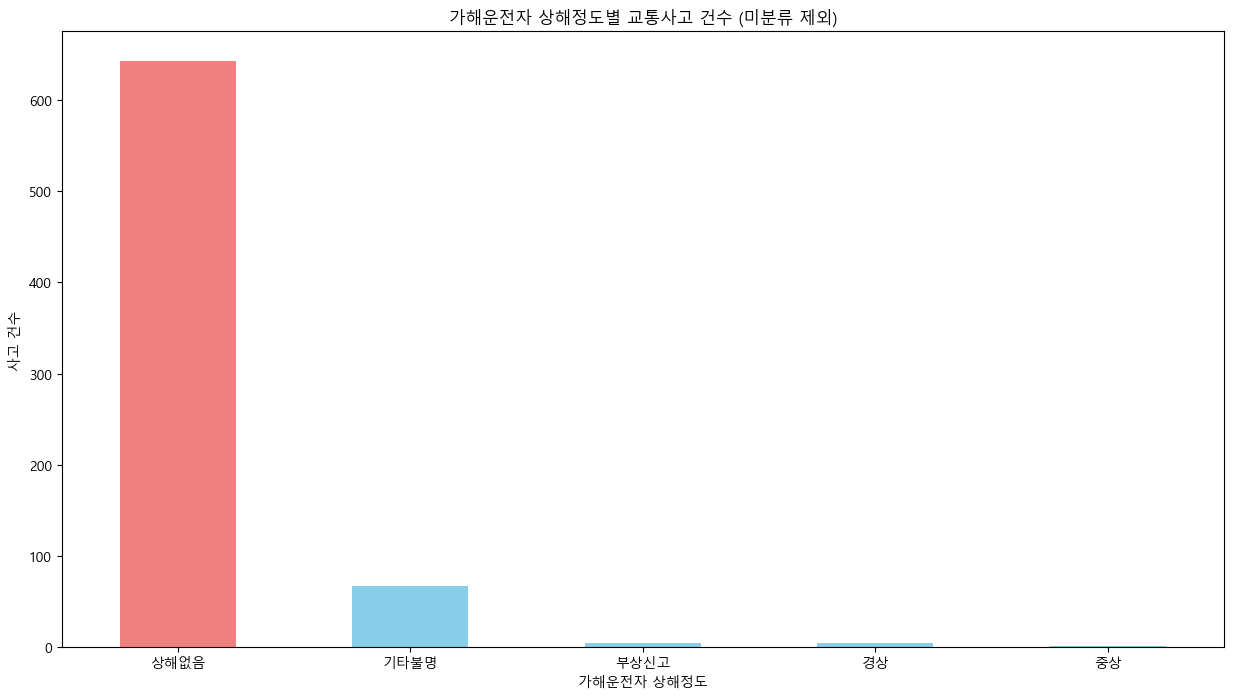

In [177]:
# '미분류' 제외하고 가해운전자 상해정도별로 그룹화하여 사고 수 계산
상해정도별_사고수 = df[df['가해운전자 상해정도'] != '미분류']['가해운전자 상해정도'].value_counts().sort_values(ascending=False)

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
상해정도별_사고수.plot(kind='bar', color=['lightcoral'] + ['skyblue'] * (len(상해정도별_사고수) - 1))
plt.title('가해운전자 상해정도별 교통사고 건수 (미분류 제외)')
plt.xlabel('가해운전자 상해정도')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)  # X축 레이블 회전 없이 표시
plt.show()

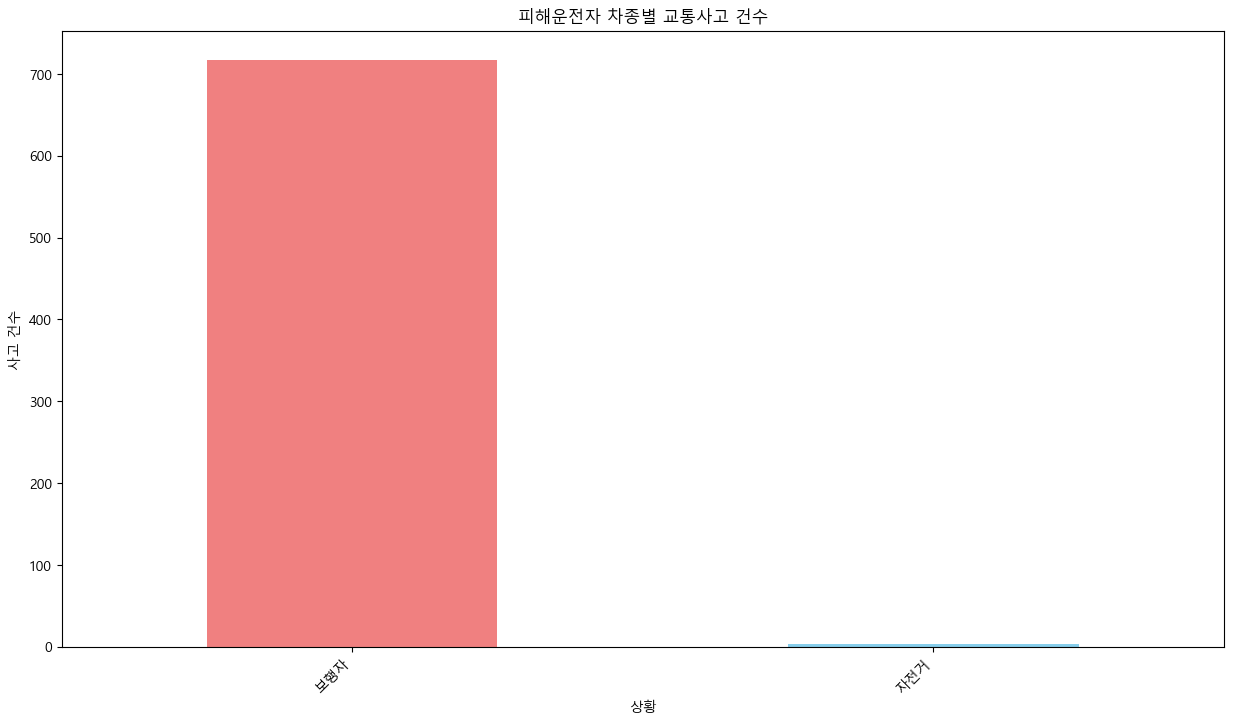

In [178]:
# '이륜'을 '자전거'로 변경
df['피해운전자 차종'] = df['피해운전자 차종'].replace('이륜', '자전거')


# 승용 차종을 제외하고 그룹화하여 사고 수 계산
상황별_사고수 = df[df['피해운전자 차종'] != '승용']['피해운전자 차종'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
상황별_사고수.sort_values(ascending=False).plot(kind='bar', color=['lightcoral','skyblue'])
plt.title('피해운전자 차종별 교통사고 건수')
plt.xlabel('상황')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

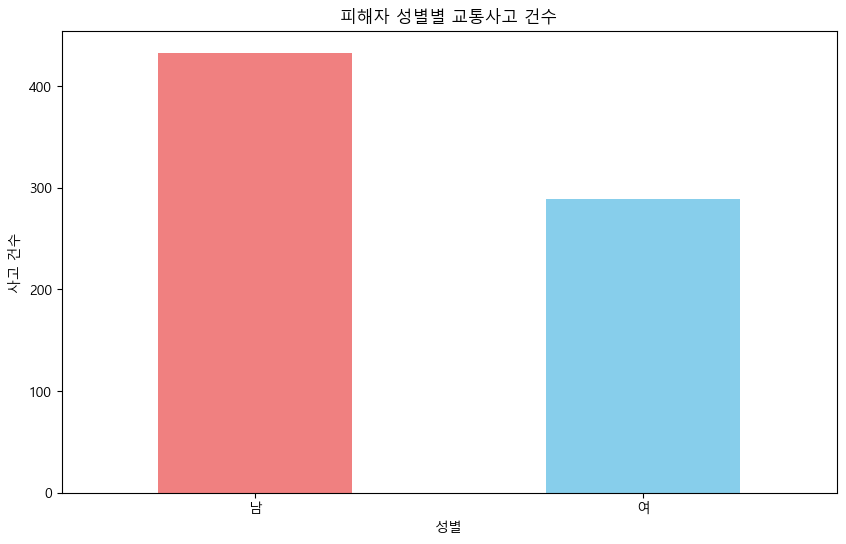

In [179]:
# 피해운전자 성별별 사고 수 계산
성별별_사고수 = df['피해운전자 성별'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
성별별_사고수.sort_values(ascending=False).plot(kind='bar', color=['lightcoral','skyblue'])
plt.title('피해자 성별별 교통사고 건수')
plt.xlabel('성별')
plt.ylabel('사고 건수')
plt.xticks(rotation=0)  # X축 레이블 회전
plt.show()

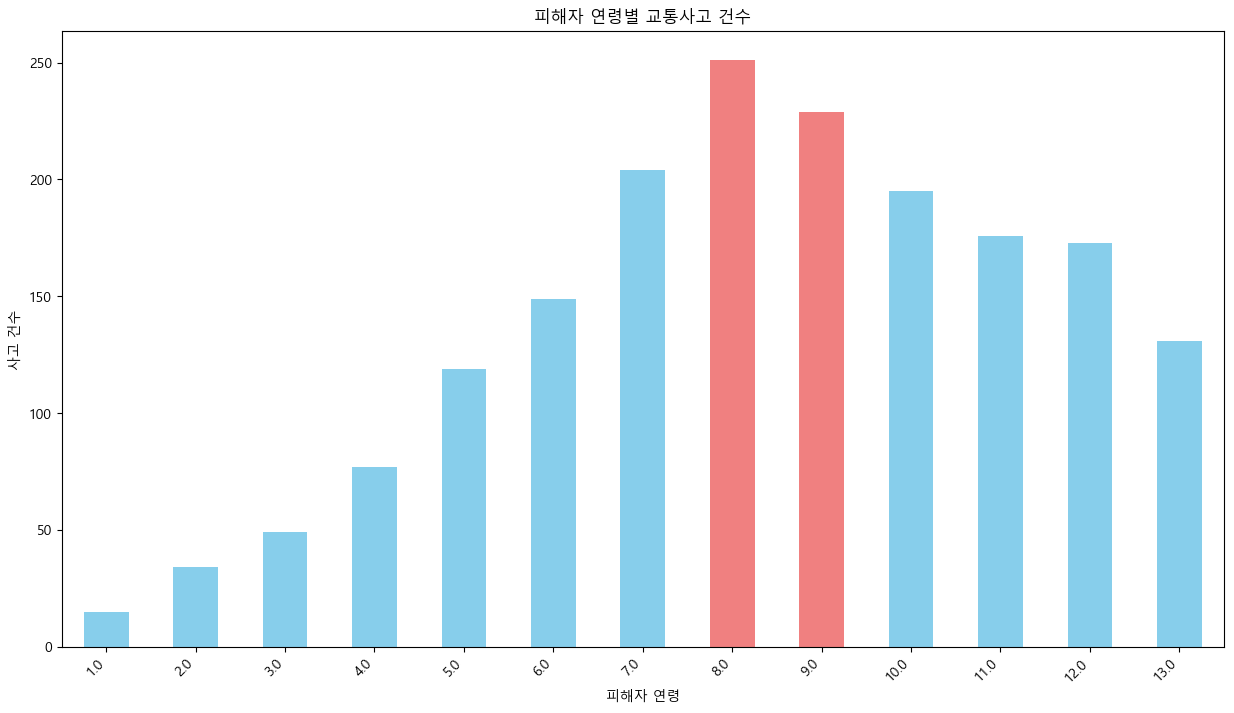

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = '2017~2019 서울시 어린이 보행자사고.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '피해운전자 연령'에서 '세' 제거하고 숫자만 추출
df['피해운전자 연령'] = df['피해운전자 연령'].str.replace('세', '').str.strip()

# 13세 이상은 13으로 표기
df['피해운전자 연령'] = pd.to_numeric(df['피해운전자 연령'], errors='coerce').apply(lambda x: min(x, 13))

# 피해운전자 연령별 사고 수 계산
연령별_사고수 = df['피해운전자 연령'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
연령별_사고수.sort_index().plot(kind='bar', color=['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','lightcoral','lightcoral',
                                             'skyblue','skyblue','skyblue','skyblue'])
plt.title('피해자 연령별 교통사고 건수')
plt.xlabel('피해자 연령')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

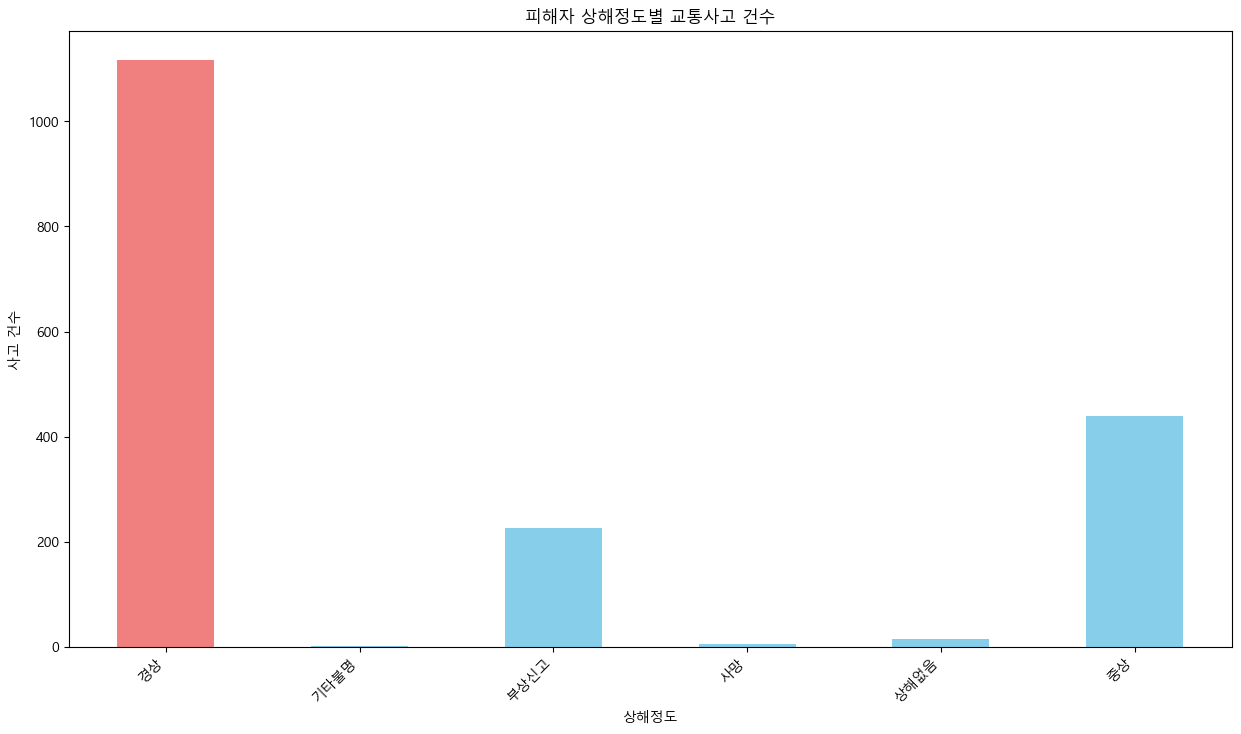

In [181]:
# '상해정도' 컬럼을 기준으로 그룹화하여 사고 수 계산
상해정도별_사고수 = df['피해운전자 상해정도'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(15, 8))
상해정도별_사고수.sort_index().plot(kind='bar', color=['lightcoral'] + ['skyblue'] * (len(상해정도별_사고수) - 1))
plt.title('피해자 상해정도별 교통사고 건수')
plt.xlabel('상해정도')
plt.ylabel('사고 건수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()